In [1]:
import sys
sys.path.append('../..')
import src.data.data_loader as dl
from src.features.vectorizer import Vectorizer
from src.models.topic_models import TopicModel

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#english/german
#editorial,forum (blog weggelassen)
data = dl.get_articles_by_type("german", "editorial")
texts = data['article_texts']

In [3]:
#LDA
lda_vec = Vectorizer.load("vectorizer/DEED_lda_german_editorial.pkl")

In [4]:
lda = TopicModel.load("topic_models/lda/DEED_lda_german_editorial_articles_190.pkl")


In [5]:
lda_document_term_matrix = lda_vec.get_document_token_matrix(texts)

In [6]:
document_topic_matrix = lda.get_document_topic_matrix(lda_document_term_matrix)

In [7]:
print(document_topic_matrix)

[[1.6254040e-04 4.2937201e-04 2.2855728e-04 ... 8.6398024e-05
  8.4326821e-05 1.2408149e-04]
 [2.6407442e-04 6.9758767e-04 3.7133007e-04 ... 1.4036824e-04
  1.3700321e-04 2.0159141e-04]
 [4.0841354e-05 4.1715700e-02 5.7429348e-05 ... 2.1709140e-05
  2.1188711e-05 3.1177824e-05]
 ...
 [5.7185240e-05 1.5106240e-04 8.0411410e-05 ... 3.0396701e-05
  2.9668006e-05 4.3654560e-05]
 [5.7509365e-05 1.5191862e-04 8.0867183e-05 ... 3.0568990e-05
  2.9836165e-05 4.3901997e-05]
 [8.9453315e-05 2.3630280e-04 1.2578539e-04 ... 4.7548732e-05
  4.6408855e-05 6.8287642e-05]]


In [8]:
#limitation per row
#wie viele topics die grenze pro doc überschritten
def amount_topic_per_dokument(min_probability, matrix):
    newMatrix = []
    for matrixrow in range(0, len(matrix)):
        count = 0 
        for matrixcolumn in range(0,(len(matrix[0]))):
            if matrix[matrixrow, matrixcolumn] >= min_probability: 
                count +=1 
        newMatrix.append(count)
    max_topic_number = max(newMatrix)
    
    
    return newMatrix, max_topic_number
                
print(amount_topic_per_dokument(0.3, document_topic_matrix))

([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0,

In [9]:
from collections import defaultdict
from collections import OrderedDict
doc_count_dict = defaultdict(int)

min_probability = 0.1
amount_topic_per_dokument2,x = amount_topic_per_dokument(min_probability, document_topic_matrix)

for doc in amount_topic_per_dokument2: 
    doc_count_dict[doc] +=1
print(doc_count_dict)

asc = OrderedDict(sorted(doc_count_dict.items()))
print(asc)

k = [k for (k,v) in asc.items()]
print(k)

v = [v for (k,v) in asc.items()]
print(v)

defaultdict(<class 'int'>, {4: 889, 3: 1568, 2: 1360, 1: 622, 0: 22, 5: 247, 6: 22})
OrderedDict([(0, 22), (1, 622), (2, 1360), (3, 1568), (4, 889), (5, 247), (6, 22)])
[0, 1, 2, 3, 4, 5, 6]
[22, 622, 1360, 1568, 889, 247, 22]


In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(k,v)
plt.title('Number of documents with amount of topics with threshold: ' + str(min_probability))
plt.xlabel('Amount of Topics')
plt.ylabel('Number of documents')

plt.show()

In [11]:
#limitation per column
def amount_doc_per_topic(min_probability, matrix):
    newMatrix = []
    for matrixcolumn in range(0, (len(matrix[0]))):
        count = 0
        for matrixrow in range (0, len(matrix)):
            if matrix[matrixrow,matrixcolumn]>= min_probability: 
                count += 1
        newMatrix.append(count)
    return newMatrix
                
print(amount_doc_per_topic(0.1, document_topic_matrix))

[49, 180, 48, 9, 40, 89, 48, 20, 38, 49, 17, 58, 40, 5, 94, 59, 41, 19, 77, 122, 69, 151, 17, 41, 32, 53, 112, 20, 120, 73, 14, 151, 31, 93, 31, 67, 30, 57, 128, 159, 25, 85, 50, 341, 28, 56, 28, 423, 15, 34, 49, 47, 21, 56, 209, 30, 34, 29, 117, 18, 21, 49, 100, 172, 22, 67, 43, 65, 142, 160, 12, 29, 35, 29, 20, 30, 14, 22, 170, 24, 22, 170, 26, 200, 42, 132, 27, 35, 21, 68, 222, 30, 173, 13, 94, 75, 144, 27, 23, 123, 138, 18, 18, 32, 21, 16, 37, 208, 34, 18, 23, 411, 36, 60, 156, 27, 175, 27, 173, 129, 62, 42, 56, 17, 17, 13, 53, 10, 20, 30, 75, 51, 102, 129, 23, 95, 31, 18, 32, 34, 18, 53, 21, 133, 51, 222, 14, 51, 99, 30, 40, 31, 331, 12, 46, 12, 20, 43, 23, 42, 10, 39, 63, 28, 26, 13, 27, 25, 60, 133, 49, 36, 66, 19, 59, 117, 113, 13, 98, 175, 25, 79, 285, 93, 28, 26, 75, 45, 24, 22]


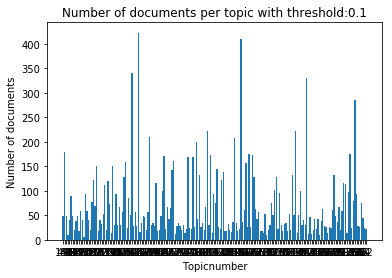

In [12]:
import matplotlib.pyplot as plt
import numpy as np

document_topic_list_threshold = 0.1
document_topic_list= amount_doc_per_topic(document_topic_list_threshold, document_topic_matrix)

topicnumber = range(0,len(document_topic_list))
plt.bar(topicnumber,document_topic_list)

plt.title('Number of documents per topic with threshold:' + str(document_topic_list_threshold))
plt.xlabel('Topicnumber')
plt.ylabel('Number of documents')
plt.xticks(np.arange(0, len(document_topic_list), step=50))
plt.xticks(topicnumber, document_topic_list)

plt.show()
#print(topicnumber)
#print(document_topic_list)

In [13]:
#limitation per column
def amount_doc_per_topictupl(min_probability, matrix):
    newMatrix = []
    topic_index = 0
    for matrixcolumn in range(0, (len(matrix[0]))):
        count = 0
        for matrixrow in range (0, len(matrix)):
            if matrix[matrixrow,matrixcolumn]>= min_probability: 
                count += 1
        newMatrix.append((topic_index,count))
        topic_index +=1
    #sortierung nach dem 2ten tupl
    sorted_by_second = sorted(newMatrix, key=lambda tup: tup[1], reverse = True)
    
    tid_list = [k for (k,v) in sorted_by_second]
    doc_count_list= [v for (k,v) in sorted_by_second]
    
    return  tid_list,doc_count_list
                
#print(amount_doc_per_topictupl(0.1, document_topic_matrix))

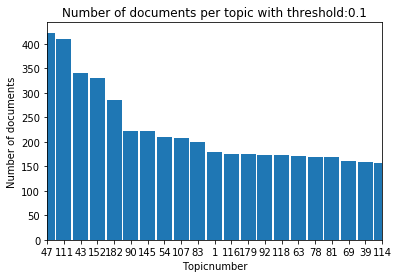

In [14]:
import matplotlib.pyplot as plt
import numpy as np

tid_list,doc_count_list = amount_doc_per_topictupl(document_topic_list_threshold, document_topic_matrix)

#print(tid_list)
#print(doc_count_list)
#topicnumber = range(0,len(tid_list))
plt.bar(topicnumber,doc_count_list,0.9)
plt.title('Number of documents per topic with threshold:' + str(document_topic_list_threshold))
plt.xlabel('Topicnumber')
plt.ylabel('Number of documents')
plt.xticks(tid_list,tid_list)

#plt.xticks(np.arange(0, len(tid_list), step=50))
plt.xticks(range(0,50), tid_list)
limit_x = 20
plt.xlim(0,limit_x)
plt.show()

In [15]:
table = lda.get_topics_dataframe()
display(table.iloc[tid_list[:limit_x+1],:])


,0,1,2,3,4,5,6,7,8,9
Topic 47,prozent,umsatz,euro,milliarde,deutschland,million,vergangen,liegen,deutsch,wachsen
Topic 111,bio,bioprodukt,konventionell,nachfrage,konventionelle,markt,biobauern,steigen,umstellen,bauer
Topic 43,produkt,regional,kunde,region,lebensmittel,regionale,supermarkt,kaufen,finden,regionalität
Topic 152,prozent,hektar,fläche,betrieb,ökologisch,bewirtschaften,steigen,anteil,million,liegen
Topic 182,tier,schwein,stall,fleisch,tierhaltung,halten,massentierhaltung,haltung,platzen,rind
Topic 90,mitglied,projekt,landwirtschaft,idee,gemeinsam,vereinen,region,konzept,solidarisch,landwirt
Topic 145,österreich,wien,österreichisch,heimisch,bio,konsument,austria,biologisch,heuer,apa
Topic 54,hof,betreiben,familie,landwirt,verkaufen,hofladen,leben,vater,arbeit,stehen
Topic 107,kontrolle,behörde,fall,kontrollieren,kontrolleure,betrug,skandal,kontrollstellen,überprüfen,all
Topic 83,schmidt,bauer,verbraucher,landwirt,prozent,preisen,fordern,deutsch,berlin,deutschland
